In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'tensorflow'

In [6]:
df=pd.read_csv('/content/drive/MyDrive/dataset/mail_data.csv')

In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Convert 'Category' column to numeric (0 = ham, 1 = spam)
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# Convert to NumPy array
y = df['Category'].astype(int).values


In [9]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Message'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['Message'])

# Padding to make sequences of equal length
X = pad_sequences(sequences, maxlen=100)  # Adjust maxlen based on average message length
y = df['Category'].values

In [10]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),  # Word Embedding
    Conv1D(filters=64, kernel_size=3, activation='relu'),  # CNN Layer
    GlobalMaxPooling1D(),  # Pooling
    Dense(64, activation='relu'),  # Hidden Layer
    Dropout(0.5),  # Prevent Overfitting
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X, y, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8556 - loss: 0.4419 - val_accuracy: 0.9731 - val_loss: 0.0991
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9847 - loss: 0.0647 - val_accuracy: 0.9830 - val_loss: 0.0453
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9979 - loss: 0.0163 - val_accuracy: 0.9821 - val_loss: 0.0456
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9991 - loss: 0.0066 - val_accuracy: 0.9839 - val_loss: 0.0488
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9999 - loss: 0.0021 - val_accuracy: 0.9839 - val_loss: 0.0495


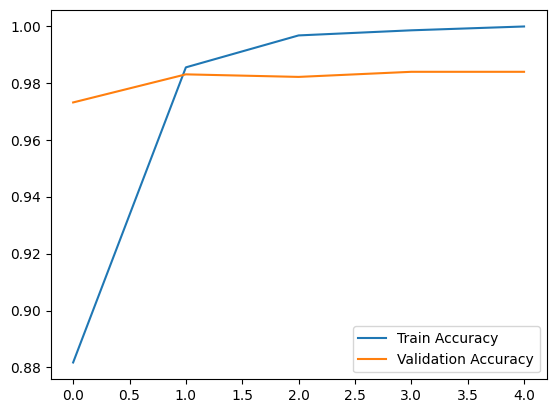

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [34]:
sample_text = ["won Congratulations "]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=100)
prediction = model.predict(sample_padded)

print("Spam" if prediction[0][0] > 0.5 else "Ham")  #

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Spam
